<a href="https://colab.research.google.com/github/Harrystone/Deep-Learning-Assignment/blob/main/swedish_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/Deep Learning Class/Assignment-1/swedish_insurance.csv"

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [ ]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data['X'],data['Y'],test_size = 0.3, random_state = 42)
x_train.shape,x_test.shape

((44,), (19,))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_test_scaled

array([[ 2.29046901],
       [ 0.37146805],
       [ 5.92995358],
       [ 1.23170986],
       [ 2.5551588 ],
       [ 2.81984858],
       [ 0.37146805],
       [-0.48877375],
       [-0.75346354],
       [-0.29025641],
       [ 0.70233029],
       [-0.5549462 ],
       [-0.35642886],
       [ 0.30529561],
       [ 0.23912316],
       [-1.01815333],
       [ 6.98871273],
       [-0.81963599],
       [-0.68729109]])

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(32, input_dim=1, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(loss = 'mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
history = model.fit(x_train_scaled, y_train.values, batch_size=32, epochs=100, validation_data= None, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/100
2/2 [==============================] - 0s 50ms/step - loss: 3728.8489 - val_loss: 4058.6770
Epoch 2/100
2/2 [==============================] - 0s 20ms/step - loss: 3647.0623 - val_loss: 3982.9353
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 3558.6648 - val_loss: 3912.0208
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 3471.5227 - val_loss: 3838.5134
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 3399.5361 - val_loss: 3764.7646
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 3313.3674 - val_loss: 3695.0564
Epoch 7/100
2/2 [==============================] - 0s 20ms/step - loss: 3241.3821 - val_loss: 3628.1670
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 3162.9568 - val_loss: 3562.7551
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 3095.5483 - val_loss: 3496.2361
Epoch 10/100
2/2 [==============================] - 0s 20ms/step

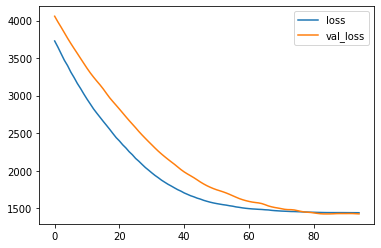

In [ ]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
predictions = model.predict(x_test_scaled)
print(mean_absolute_error(y_test,predictions))
print(np.sqrt(mean_squared_error(y_test,predictions)))

33.33676442598041
37.5850630435822
